In [145]:
import torch

In [146]:
torch.version.__version__

'1.8.0+cu101'

In [147]:
torch.cuda.is_available()

True

In [148]:
a = torch.ones(3,3)

In [149]:
a

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [150]:
b = torch.ones(3,3)

In [151]:
a + b

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

In [152]:
a = a.to('cuda')
b = b.to('cuda')
a + b

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]], device='cuda:0')

In [153]:
a @ b

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], device='cuda:0')

In [154]:
a = torch.rand(5, 5)
b = torch.rand(5, 5)
r_cpu = a @ b
a = a.to('cuda')
b = b.to('cuda')
r_gpu = a @ b

In [155]:
dif = r_cpu - r_gpu.to('cpu')
dif.sum()

tensor(1.7881e-07)

In [165]:
K = 3000;
m1 = torch.rand(K, K)
m2 = torch.rand(K, K)

In [166]:
%timeit -n1 -r1 -o m1 @ m2

1 loop, best of 1: 602 ms per loop


<TimeitResult : 1 loop, best of 1: 602 ms per loop>

In [167]:
cpu_time = _

In [168]:
m1 = m1.to('cuda')
m2 = m2.to('cuda')

In [169]:
%timeit -n1 -r1 -o r_gpu = m1 @ m2

1 loop, best of 1: 165 µs per loop


<TimeitResult : 1 loop, best of 1: 165 µs per loop>

In [170]:
gpu_time = _

In [171]:
cpu_time_tensor = torch.tensor(cpu_time.all_runs)
cpu_time_mean = cpu_time_tensor.mean()
gpu_time_tensor = torch.tensor(gpu_time.all_runs)
gpu_time_mean = gpu_time_tensor.mean()


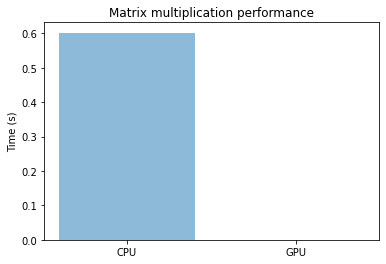

CPU: 0.601768434047699 seconds
GPU: 0.00016467200475744903 seconds


In [172]:
import matplotlib.pyplot as plt
objects = ('CPU', 'GPU')
pos = range(len(objects))
performance = [cpu_time_mean.tolist(),gpu_time_mean.tolist()]

y=plt.bar(pos, performance, align='center', alpha=0.5)
plt.xticks(pos, objects)
plt.ylabel('Time (s)')
plt.title('Matrix multiplication performance')

plt.show()

print(f"CPU: {cpu_time_mean} seconds")
print(f"GPU: {gpu_time_mean} seconds")

In [173]:
cpu_time

<TimeitResult : 1 loop, best of 1: 602 ms per loop>